# PRODUCER

## Approaches to send messages to broker

### 1) Fire and forget
- **Profile**: We do not wait for response
- **Usage**: Cases when it is okay if we loose somw messages(3-5%. Don't use it if we cannot loose any messages
- **Drawbacks**: Loose of messages and less control over the flow

### 2) Synchronous send
- **Profile)**: We are waiting for response from Kafka. If we get success then it returns record_metadata, otherwise we get an exception
- **Usage**: When all the messages are critical and we cannot afford to loose anything
- **Drawbacks**: It slows down the program because we need to wait for the response(acknowledgement)

### 3) Asynchronous send
- **Profile)**: We don't wait for success or failure. We use callbacks functions
- **Usage**: When we need fast sending and at the same time exception handling
- **Drawbacks**: We have limited max.in.flight requests(the amount of messages we can send to kafka without receiving responses)

## Partitioner

Default partitioner
- If a partition is specified use it
- if no partition is specified but a key is present choose a partition based on a hash of the key
- If no partition or key is present choose a partition in a round-robin fashion

Do not use key for partitioning because different key-value pairs can end up in the same partition

## Serializer

### Definition: 
Transfering a data structure to a series of bytes

### Example - Serialize & Deserialize
- Create a Customer class
- Create a producer
- Create a serializer
- Create a deserializer
- Create a consumer

## Producer Settings

Producer has 4 main parameters:
- bootstrap.servers `->` a list of kafka brokers urls
- key.serializer    `->` name of a class to serialize a key
- value.serializer  `->` name of a class to serialize a key
- partitioner.class `->` custom partitioner class

### Kafka Produer config

- **acks** `->` used to configure acknowledgements  
`acks == 0` will not wait for the response from kafka  
`acks == 1` will wait for the response   
`acks == all` will wait for the reponse + response will be sent back only if the replicas of the message were created 
- **retries** `->` defines how many time the producer will retry before receiving a successfull response
- **max.in.flight.request.per.connection** `->` the number of the messages that are waiting for the response

### Example
If we need to maintain an order of records while sending them to kafka we need to do either
- **Use Synchronous send**  
- **max.in.flight.requests.per.connection = 1**

# CONSUMER

## Consumer Groups
- **Consumer groups** are used to read and process data in parallel
- **Partitions** are never shared among members of same group at the same time 
- **Group Coordinator** maintains a list of active consumers
- **Rebalance** is initiated when a list of consumers is modified
- **Group leader** executes a rebalance activity

## Offset Management
Kafka Offsets:
- Current offset `->` used to avoid resending same records to the consumer
- Committed offset `->` the offset of the last record that a consumer successfully processed 
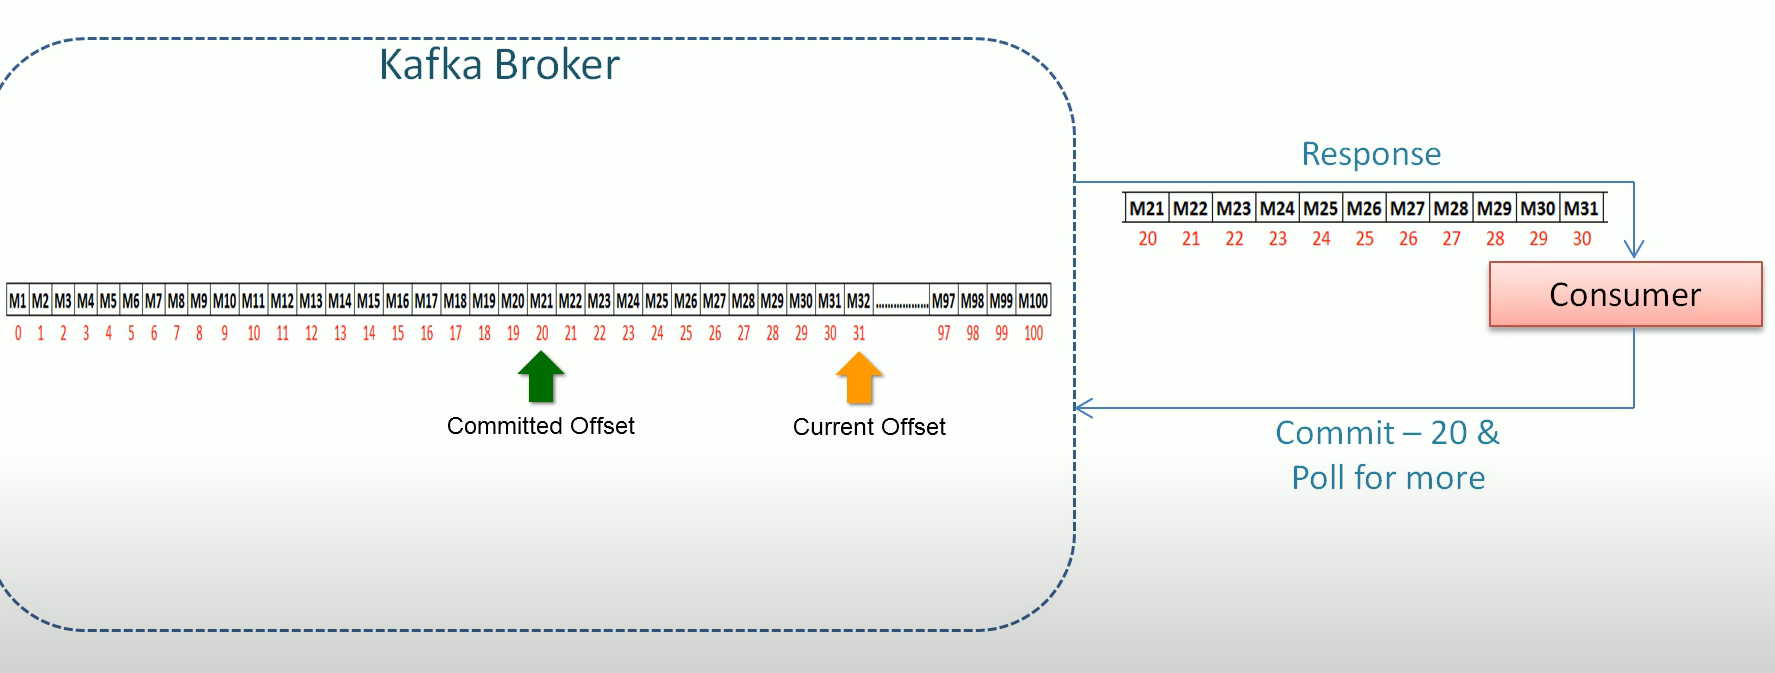

### How to commit an offset  
**Auto commit**  
Parameters:
- enable.auto.commit (boolean)
- auto.commit.interval.ms (kafka will commit offset every N ms)

**Manual commit**
- Commit sync
- Commit async

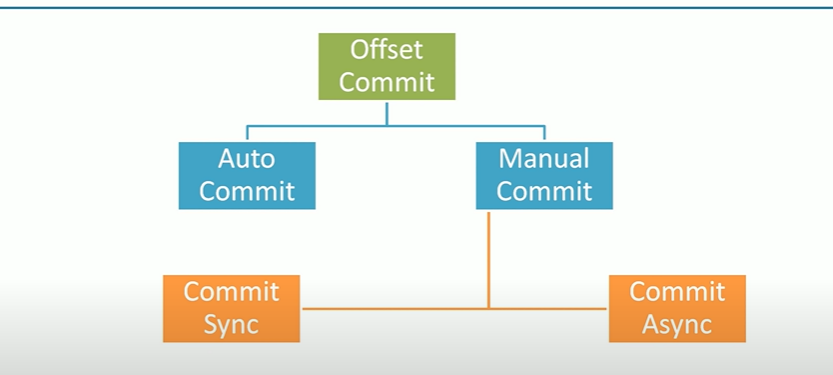

## Rebalance Listener

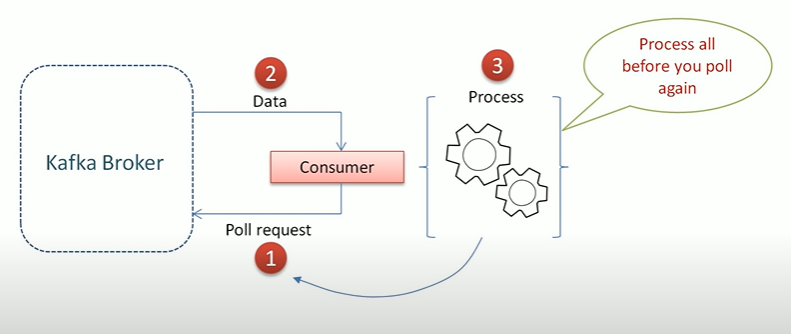

If we have to process the rocords and this process is long we can have two riscs
1) Delay in the next poll. If we do not poll for a long time the group coordinator might trigger REBALANCE  
2) Rebalance triggered

**Rebalance is triggered if you don't poll for a while or something went wrong**

Before rebalancing we might want to commit an offset before the ownership of the partition is taken and the next consumer will start consuming from the last commited offset

1) Maintain an offset of processed record  
2) Commit when rebalance is triggered (WE can use ConsumerRebalanceListener class)

## ConsumerRebalanceListener

1) Maintain a list of offsets that are processes and ready to be commited  
2) Commit the offsets when Partitions are goind away

We need to overload two methods:
- onPartitionAssigned (1)
- onpartitionRevoked (2)

1) Print the list of partitons that are assigned  
2) Print the list of partitons that are going away


## Why a consumer group

1) Allows to process a topic in parallel  
2) Automatically manages partition assignment  
3) Detect entry/exit/failure of a consumer and perform partition rebalance activity

Automatic partition assignment has some drawbacks:
1) We cannot control which partition will be assigned to which consumer